In [1]:
library(targets)
library(Seurat)
library(CellAnnotatoR)
library(tidyverse)
source('../00_cellbender/cellbender_preprocess.R')
source('../00_cellbender/process_seurat.R')

Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
tar_meta() %>%
filter(name == 'obj_cb_00')

name,type,data,command,depend,seed,path,time,size,bytes,format,repository,iteration,parent,children,seconds,warnings,error
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<list>,<dttm>,<chr>,<int64>,<chr>,<chr>,<chr>,<lgl>,<list>,<dbl>,<chr>,<chr>
obj_cb_00,stem,7887e7921aba1df3,e8ca5029835af39c,bb158f26d0da39de,-1373720759,NA,2024-01-16 13:30:16,ec175ae01141e220,813573987,qs,local,vector,NA,NA,2383.055,NA,NA


In [14]:
obj = qs::qread('_targets/objects/obj_Day14.Astrocytes')
obj

An object of class Seurat 
21177 features across 7902 samples within 2 assays 
Active assay: integrated (2000 features, 2000 variable features)
 2 layers present: data, scale.data
 1 other assay present: RNA
 2 dimensional reductions calculated: pca, umap

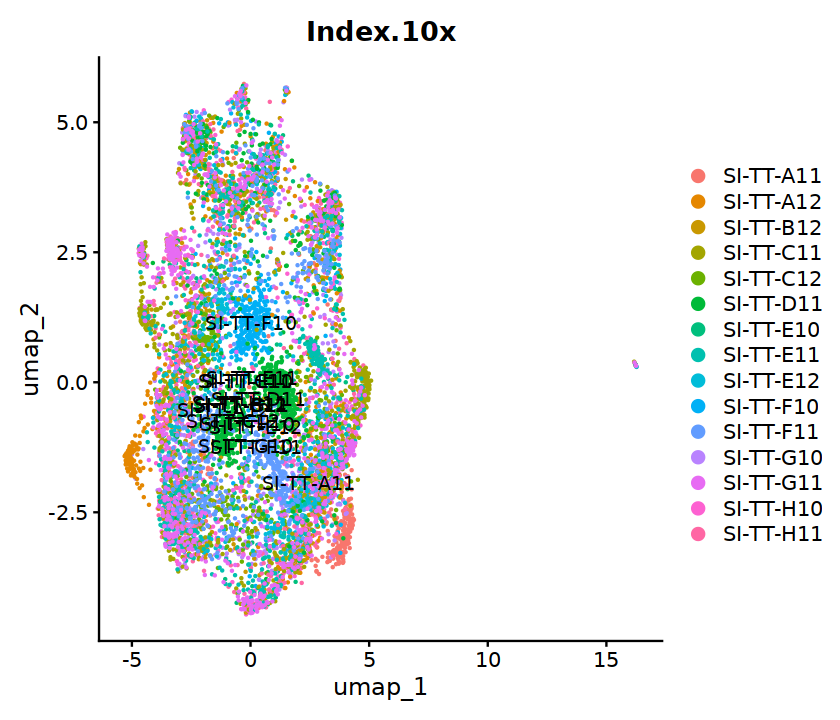

In [15]:
options(repr.plot.width=7, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='Index.10x', label=T)

In [16]:
obj %>% `[[` %>% pull(nCount_RNA) %>% summary

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1100    2302    2898    3055    3637   10088 

In [19]:
obj = qs::qread('../00_cellbender/_targets/objects/obj_Day14.Oligodendrocytes')
obj

An object of class Seurat 
22534 features across 1441 samples within 2 assays 
Active assay: SCT (11267 features, 3000 variable features)
 3 layers present: counts, data, scale.data
 1 other assay present: RNA

In [20]:
options(repr.plot.width=7, repr.plot.height=6)
DimPlot(obj, reduction = "umap", group.by='Index.10x', label=T)

ERROR: [1m[33mError[39m in `object[[reduction]]`:[22m
[33m![39m ‘umap’ not found in this Seurat object
 


In [ ]:
remove_raw_from_meta = function(obj){
    obj
}

In [7]:
obj %>% 
`[[` %>%
rownames_to_column %>%
mutate(rowname = str_replace(rowname, '_raw_', '_')) %>%
column_to_rownames

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
SI-TT-A11_AAACCCAAGAATTGCA,SI-TT-A11,7965,3821
SI-TT-A11_AAACCCAAGGTGGTTG,SI-TT-A11,5430,2686
SI-TT-A11_AAACCCACAAAGGGTC,SI-TT-A11,4656,2843
SI-TT-A11_AAACCCACAAGCACAG,SI-TT-A11,1319,977
SI-TT-A11_AAACCCACATACAGCT,SI-TT-A11,6798,3192
SI-TT-A11_AAACCCACATGAGGGT,SI-TT-A11,13577,5516
SI-TT-A11_AAACCCAGTACGTTCA,SI-TT-A11,3850,2247
SI-TT-A11_AAACCCAGTATCGGTT,SI-TT-A11,1535,1176
SI-TT-A11_AAACCCATCCAAGCAT,SI-TT-A11,6045,3023
